<a href="https://colab.research.google.com/github/Marlup/Simulation-of-investment-and-compound-returns/blob/fix/investment_scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

Cloning into 'Simulation-of-investment-and-compound-returns'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 74 (delta 34), reused 40 (delta 14), pack-reused 0
Receiving objects: 100% (74/74), 444.23 KiB | 1.76 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [2]:
import os

In [3]:
os.listdir()

['.config', 'Simulation-of-investment-and-compound-returns', 'sample_data']

In [4]:
os.chdir("./Simulation-of-investment-and-compound-returns")
os.listdir()

['README.md',
 'LICENSE',
 '.gitignore',
 '.git',
 'case_household expenses.ipynb',
 'compound_functions.py',
 'loan_and_real-state_comparation.ipynb',
 'investment_scenarios.ipynb']

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bokeh import plotting as bk
from bokeh.models import Span

from compound_functions import (
    get_compound_return,
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    DEFAULT_RETIREMENT_YEARS,
    define_scenario
)

In [ ]:
# Plot earning and contribution evolutions
def plot_scenario_bokeh(earnings, principal, w= 400, h=300):
    plot = bk.figure(width=w,
                     height=h,
                     title='Evolution of yields',
                     #tools='hover'
                     )
    source = ColumnDataSource(
        data=dict(month=np.arange(len(earnings)),
                  year=np.arange(len(earnings)) // 12,
                  earning=earnings)

        )
    curve = plot.line(x='month',
                      y='earning',
                      source=source)

    # zero-earnings baseline
    hline = Span(location=earnings[0],
                 dimension='width',
                 line_color='red',
                 line_width=1,
                 line_dash='dashed')
    #plot.renderers.extend([curve, hline])
    plot.add_layout(hline)
    plot.xaxis.axis_label = "month"
    plot.yaxis.axis_label = "yield (€)"

    hover = HoverTool(
        tooltips=[
            ('year',  '@year (month @month)'),
            ('yield', '€ @earning{%0.2f}'), # use @{ } for field names with spaces
        ],

        formatters={
            '@month': 'printf', # use default 'numeral' formatter for other fields
            '@earning': 'printf',   # use 'printf' formatter for '@{adj close}' field
        },
        # display a tooltip whenever the cursor is vertically in line with a glyph
        mode='vline'
    )

    plot.add_tools(hover)

    return plot

In [6]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

### Calculation of composed return. Composed return function

In [7]:
# Calculation of composed return. Composed return function
principal_amount = 1e+4
annual_contribution = 100 * 12
roi = 0.06
years = 30
compounding_frequency = 12

periodic_contribution = annual_contribution / compounding_frequency

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    periodic_contribution,
    years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

Total amount 68596.71
Accumulated roi 6.02


### Estimation of composed return. Simulation

Scenario

In [10]:
# Define initial parameters
initial_principal = 1e+4
annual_contribution = 200 * 12
annual_roi = 0.06
duration = 60
retirement_at = 30
retirement_income = 1500
retirement_contribution = 0.5 * annual_contribution
compounding_frequency = 1  # Compounding once per year

# Calculate the total balance and earnings using the updated function
total_balance, earnings = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    investment_duration=duration,
    retirement_at=retirement_at,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution
)

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print("Total balance:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))

Total balance: 175934.72
Total earnings: 596334.72


In [39]:
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
output_notebook()

In [57]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 1e4 # @param {type:"number", "min": 0.0, "max": 1.0e9}
monthly_contribution = 100 # @param {type:"number", "min": 0.0, "max": 1.0e9}
annual_contribution = monthly_contribution * 12
annual_roi = 0.06 # @param {type:"number", "min": 0.0, "max": 1.0}
duration = 60 # @param {type:"slider", "min": 0.0, "max": 150, "step": 1}
retirement_at = 30 # @param {type:"slider", "min": 0, "max": 150, "step": 1}
retirement_income = 1500 # @param {type:"number", "min": 0.0, "max": 1.0e9}
retirement_contribution_ratio = 0.5# @param {type:"number", "min": 0.001, "max": 1.0}
retirement_contribution = retirement_contribution_ratio * annual_contribution
 # Compounding once per year
compounding_frequency = 1 # @param {type:"slider", "min": 0, "max": 24, "step": 1}

# Calculate the total balance and earnings using the updated function
total_balance, earnings = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    investment_duration=duration,
    retirement_at=retirement_at,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution
)

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))

# Basic plot setup
renderer = plot_scenario_bokeh(earnings,
                               initial_principal)

bk.show(renderer)

Total balance after 60 years: -264457.9
Total earnings: 193492.1


In [11]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
virtual_returns = np.arange(0.06, 0.11, 0.01)
years_of_investment = [60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.0, 0.02, 0.03, 0.04, 0.05, 0.06]#np.arange(30, 30 + 5, 5)
retirement_years = 30
retir_incomes = [
    1.0e3,
    1.5e3,
    2.0e3,
    2.5e3,
    3.0e3
    ]
terms = (1, 3, 6, 12)
yearly_contributions = list(map(lambda x: 12 * x, range(50, 500, 50) ))
results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          yearly_contributions,
                          inflation_rates,
                          retirement_years,
                          retir_incomes
                          )
df = build_dataframe(results)
df

,initial_amount,roi,duration,term,contribution,inflation_rate,retirement_income,retirement_contribution,total_amount
0,5000,0.06,60,1,600,0.00,1000.0,300.0,-4.894143e+05
1,5000,0.06,60,1,600,0.00,1500.0,300.0,-9.886755e+05
2,5000,0.06,60,1,600,0.00,2000.0,300.0,-1.487937e+06
3,5000,0.06,60,1,600,0.00,2500.0,300.0,-1.987198e+06
4,5000,0.06,60,1,600,0.00,3000.0,300.0,-2.486459e+06
...,...,...,...,...,...,...,...,...,...
21595,20000,0.10,60,12,5400,0.06,1000.0,2700.0,5.835772e+05
21596,20000,0.10,60,12,5400,0.06,1500.0,2700.0,2.513545e+05
21597,20000,0.10,60,12,5400,0.06,2000.0,2700.0,-8.086819e+04
21598,20000,0.10,60,12,5400,0.06,2500.0,2700.0,-4.130909e+05


Case:

+ €15,000 initial amount
+ 0.09 expected roi
+ 1 maximum number of terms
+ [1,200, 2,400] € span monthly contributions
+ 30 years of investment
+ [1,500, 2,000] € span of retirement incomes
+ [0.02, 0.04] span of inflation rates


In [ ]:
# Case
initial_amounts = (10_000, 10_000)
max_roi = 0.09
max_term = 1
contributions = (1200, 2400)
min_years = 60
retirement_incomes = (1000, 2000)
inflation_rates = (0.01, 0.06)

df_positive = df[df["total_amount"] > 0.0]
print(df_positive.shape)
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["retirement_income"].between(retirement_incomes[0], retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["retirement_income", "total_amount", "contribution"],
                                    ascending=False)
df_case.head()

(7393, 9)


,initial_amount,roi,duration,term,contribution,inflation_rate,retirement_income,retirement_contribution,total_amount
8737,10000,0.09,60,1,2400,0.02,2000.0,1200.0,347683.359151
8736,10000,0.09,60,1,2400,0.02,1500.0,1200.0,947982.152348
8706,10000,0.09,60,1,1800,0.02,1500.0,900.0,426099.182529
8741,10000,0.09,60,1,2400,0.03,1500.0,1200.0,192893.962248
7656,10000,0.08,60,1,2400,0.02,1500.0,1200.0,182417.585278


Case:
- €10,000 initial amount
- 30 years investment duration
- 12 months term
- €200 monthly contribution
- retirement income €1000
- 0.04 inflation rate

Number of cases: 5


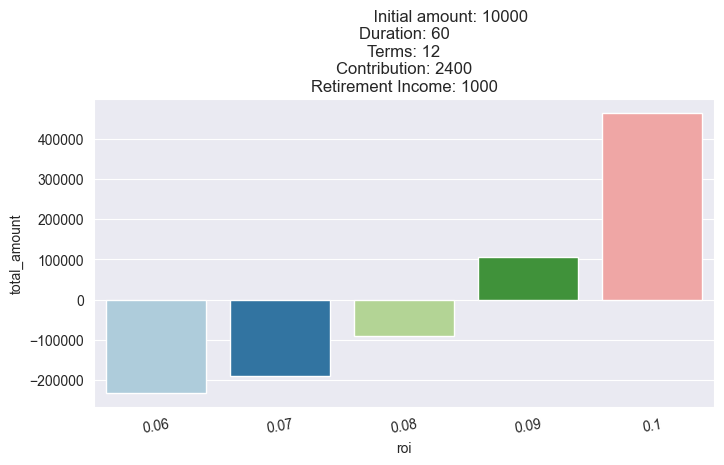

In [ ]:
case_ini_amount = 10_000
case_years = 60
case_terms = 12
case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000
inflation = 0.04
case_rois = df[(df["initial_amount"] == case_ini_amount) & \
                (df["duration"] == case_years) & \
                (df["term"] == case_terms) & \
                (df["contribution"] == case_annual_contribution) & \
                (df["retirement_income"] == retir_income) & \
                (df["inflation_rate"] == inflation)
                ][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {case_ini_amount}\nDuration: {case_years}\nTerms: {case_terms}\nContribution: {case_annual_contribution}\nRetirement Income: {retir_income}"
_ = plt.title(20*" " + title)
_ = plt.xticks(rotation=10)